# Black & Scholes + Greeks ==> EL.Taoufik <==

In [149]:
import numpy as np
import pandas as pd
import scipy.stats as si
import matplotlib.pyplot as plt
import sympy as sy
import sympy.stats as systats
from IPython.display import Image
from IPython.core.display import HTML 

# Formule de Black & Scholes

In [150]:
Image(url= "https://tradeoptionswithme.com/wp-content/uploads/2019/10/bsf_compressed.jpg")

In [151]:
s = 100
k = 120
r = 0.05
t = 5
vol = 0.30

In [152]:
d1 = ((np.log(s/k)) + (r + (vol**2)/2)*t)/ (vol* np.sqrt(t))
d2 = d1 - (vol* np.sqrt(t))

In [153]:
call_price = (s * si.norm.cdf(d1)) - (k * np.exp(-r*t) * si.norm.cdf(d2))
call_price = str(round(call_price, 3))
put_price = (k * np.exp(-r*t) * si.norm.cdf(-d2)) - (s * si.norm.cdf(-d1))
put_price = str(round(put_price, 3))
print("The Put option price is ", put_price)
print("The Call option price is ", call_price)

The Put option price is  22.261
The Call option price is  28.805


# Greeks 

In [154]:
Image(url= "https://lh4.googleusercontent.com/asFkiGdZuNYuC8gSiAs5YcoRX2JTqrVINgOb-bkEjlwuHYBt2BwAZxGlRe2LBmSAl33Pr2ttXgWSYqmz8IYhdNNpClWEPt6bLN6qUrG5VoBOeQ48QrDZ-GKAZmoTXlzpzeQt-7Y")

In [155]:
## DELTA CALL and DELTA PUT
def delta_call(s, k, r, vol, t):
    d1 = ((np.log(s/k)) + (r + (vol**2)/2)*t)/ (vol* np.sqrt(t))
    dc = si.norm.cdf(d1, 0.0, 1.0)
    delta_call = dc
    return delta_call

def delta_put(s, k, r, vol, t):
    d1 = ((np.log(s/k)) + (r + (vol**2)/2)*t)/ (vol* np.sqrt(t))
    dp = si.norm.cdf(-d1, 0.0, 1.0)
    
    delta_put = -dp
    return delta_put
## THETA
def theta_call(s, k, r, vol, t):
    d1 = ((np.log(s/k)) + (r + (vol**2)/2)*t)/ (vol* np.sqrt(t))
    d2 = d1 - (vol* np.sqrt(t))
    #d2 = ((np.log(s/k)) + (r - (vol**2)/2)*t)/ (vol* np.sqrt(t))
    prob_density = 1 / np.sqrt(2 * np.pi) * np.exp(-d1**2 * 0.5)
   
    theta = -((vol * s * prob_density) / (2*np.sqrt(t))) - (r * k * np.exp(-r*t) * si.norm.cdf(d2, 0.0, 1.0))
    
    return theta
def theta_put(s, k, r, vol, t):
    d1 = ((np.log(s/k)) + (r + (vol**2)/2)*t)/ (vol* np.sqrt(t))
    d2 = d1 - (vol* np.sqrt(t))
    #d2 = ((np.log(s/k)) + (r - (vol**2)/2)*t)/ (vol* np.sqrt(t))
    prob_density = 1 / np.sqrt(2 * np.pi) * np.exp(-d1**2 * 0.5)
   
    theta = -((vol * s * prob_density) / (2*np.sqrt(t))) - (r * k * np.exp(-r*t) * si.norm.cdf(-d2, 0.0, 1.0))
    
    return theta
## GAMMA
def gamma(s, k, r, vol, t):
    d1 = ((np.log(s/k)) + (r + (vol**2)/2)*t)/ (vol* np.sqrt(t))
    d2 = d1 - (vol* np.sqrt(t))
    prob_density = 1 / np.sqrt(2 * np.pi) * np.exp(-d1**2 * 0.5)
   
    gamma = prob_density / (s * vol * np.sqrt(t))
    
    return gamma
## VEGA
def vega(s, k, r, vol, t):
    d1 = ((np.log(s/k)) + (r + (vol**2)/2)*t)/ (vol* np.sqrt(t))
    d2 = d1 - (vol* np.sqrt(t))
    prob_density = 1 / np.sqrt(2 * np.pi) * np.exp(-d1**2 * 0.5)
   
    vega = s * prob_density * np.sqrt(t)
    vega = vega /100
    
    return vega
## RHO
def rho_call(s, k, r, vol, t):
    d1 = ((np.log(s/k)) + (r + (vol**2)/2)*t)/ (vol* np.sqrt(t))
    d2 = d1 - (vol* np.sqrt(t))
    
    rho_call = t * k * np.exp(-r*t) * si.norm.cdf(d2, 0.0, 1.0)
    rho_call = rho_call/100
    
    return rho_call

def rho_put(s, k, r, vol, t):
    d1 = ((np.log(s/k)) + (r + (vol**2)/2)*t)/ (vol* np.sqrt(t))
    d2 = d1 - (vol* np.sqrt(t))
    
    rho_put = -t * k * np.exp(-r*t) * si.norm.cdf(-d2, 0.0, 1.0)
    rho_put = rho_call/100
    
    return rho_put

        Greek    Valeur
0  delta_call  0.668690
1   delta_put -0.331310
2  theta_call -4.336404
3   theta_put -5.202834
4       gamma  0.005407
5        vega  0.811072
6    rho_call  1.903188
7     rho_put  0.019032


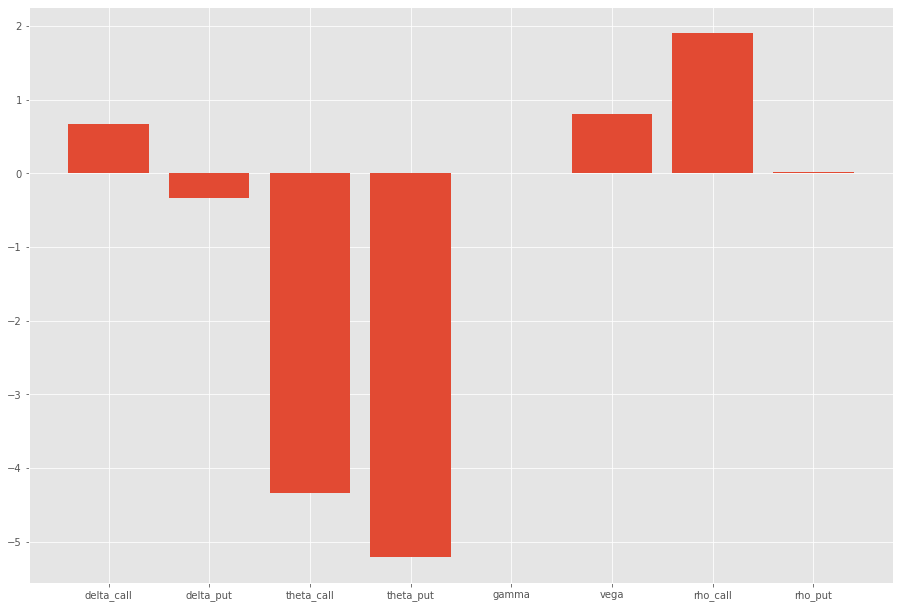

In [156]:
delta_call=delta_call(s, k, r, vol, t)
delta_put=delta_put(s, k, r, vol, t)
theta_call=theta_call(s, k, r, vol, t)
theta_put=theta_put(s, k, r, vol, t)
gamma=gamma(s, k, r, vol, t)
vega=vega(s, k, r, vol, t)
rho_call=rho_call(s, k, r, vol, t)
rho_put=rho_put(s, k, r, vol, t)
data = {'Greek':['delta_call','delta_put','theta_call','theta_put','gamma','vega','rho_call','rho_put'],'Valeur':[delta_call,delta_put,theta_call,theta_put,gamma,vega,rho_call,rho_put]}
df = pd.DataFrame(data)
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
Greek = ['delta_call','delta_put','theta_call','theta_put','gamma','vega','rho_call','rho_put']
Valeur = [delta_call,delta_put,theta_call,theta_put,gamma,vega,rho_call,rho_put]
ax.bar(Greek,Valeur)
print(df)
plt.show()